In [7]:
import numpy as np
import matplotlib.pyplot as plot
import os

import sklearn
from sklearn.tree import DecisionTreeClassifier as Tree

#%matplotlib nbagg

import mpld3
mpld3.enable_notebook()

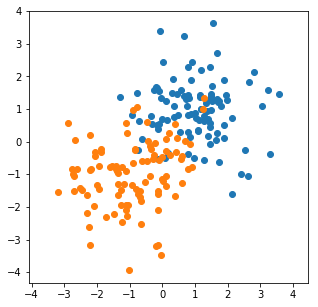

In [9]:
n = 100
x0 = np.random.multivariate_normal([1,1], np.array([[1,0],[0,1]]), n)
x1 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]), n)
y0 = np.zeros(n)
y1 = np.ones(n)

x = np.r_[x0,x1]
y = np.r_[y0,y1]

plt.figure(figsize=[5,5])

plt.plot(x[:n,0], x[:n,1], 'o', color='C0')
plt.plot(x[n:,0], x[n:,1], 'o', color='C1')
plt.axis('equal')

plt.show()

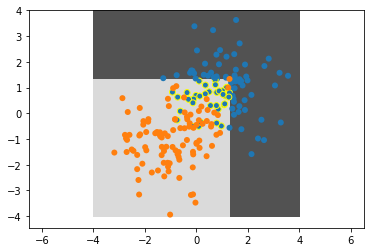

In [12]:
model = Tree(criterion='gini',class_weight={0:1, 1:50}, max_depth=3)
model.fit(x, y)
path = model.decision_path(x)
#print model.tree_.children_left

sklearn.tree.export_graphviz(model, out_file='tree.dot', rounded=True, filled=True)
os.system("dot -T png tree.dot -o tree.png")

xi, xj = np.meshgrid(np.linspace(-4,4,n*5), np.linspace(-4,4,n*5))
z = model.predict(np.c_[np.ravel(xi), np.ravel(xj)])
z = z.reshape(xi.shape)

#plt.figure(figsize=[3,3])
plt.contourf(xi, xj, z, cmap='Greys_r', levels=[-0.5,0.5,1.5])
c = [(0,0,0,0) if i==True else (1.0,1.0,0,1) for i in np.equal(model.predict(x),y) ]
plt.scatter(x[:n,0], x[:n,1], color='C0', edgecolor=c[:n])
plt.scatter(x[n:,0], x[n:,1], color='C1', edgecolor=c[n:])

#plt.plot(x[n:,0], x[n:,1], 'o', color='C1', markeredgecolor='white')

plt.axis('equal')
plt.show()

In [4]:
def printNode(tree, i, level=0):
    impurity = tree.impurity
    feature = tree.feature
    threshold = tree.threshold
    children_left = tree.children_left
    children_right = tree.children_right
    n = tree.node_count
    
    if children_left[i] != children_right[i]:
        s = 'x_%d <= %f' % (feature[i], threshold[i])
    else:
        s = 'leave'
    print '    '*level, '%d:'%i, s


def show(tree, i=0, level=0):
    children_left = tree.children_left
    children_right = tree.children_right

    printNode(tree, i, level)
    if children_left[i] != children_right[i]:
        show(tree, children_left[i], level+1)
        show(tree, children_right[i], level+1)

    

In [5]:
tree = model.tree_
show(tree)

 0: x_0 <= 0.107503
     1: x_1 <= 0.688645
         2: x_1 <= 0.263585
             3: leave
             4: leave
         5: x_0 <= -1.441066
             6: leave
             7: leave
     8: x_1 <= -0.617762
         9: x_0 <= 1.134454
             10: leave
             11: leave
         12: x_0 <= 0.569250
             13: leave
             14: leave


In [6]:
tree.children_left
tree.children_right

array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1])